In [16]:
import pandas as pd
import os, shutil
import tensorflow as tf
import IPython.display as display
import numpy as np
import time
import functools
from sklearn.metrics import confusion_matrix, f1_score
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam, SGD
from keras.optimizers import RMSprop
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [17]:
import time

# Load in Images

A string of thie file path containing the chest x-ray training data is assigned to DATADIR. Within the file path or the two folders. One folder has normal chest xray photos and another folder has chest xrays of people with pneumonia.

In [18]:
DATADIR = 'C:/Users/Raizel/Desktop/Flatiron/phase1/Project4/PneumoniaClassification/chest_xray/train'
CATEGORIES = ['NORMAL', 'PNEUMONIA']

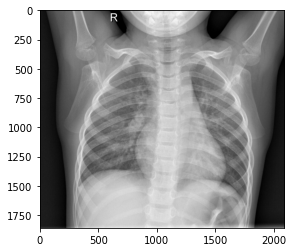

In [19]:
#iterate through all images in the two folders
for category in CATEGORIES: 
    path = os.path.join(DATADIR, category) #joins the images
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) #cv2.imread() loads an image
        plt.imshow(img_array)
        plt.show()
        break
    break

In [20]:
data_all = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        DATADIR, 
        target_size=(224, 224), 
        batch_size = 5232, 
        seed = 123) 

Found 5216 images belonging to 2 classes.


In [21]:
#split images and labels
images, labels = next(data_all)

In [22]:
images[0][0][0]

array([0.227451, 0.227451, 0.227451], dtype=float32)

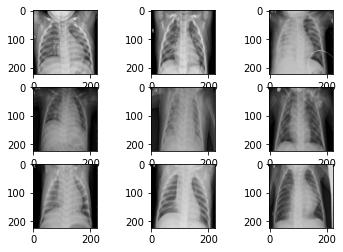

In [23]:
#visualize images
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(images[i])
plt.show()

In [24]:
#reshape labels

labels = np.reshape(labels[:,0], (5216,1))

In [25]:
#training and testing
from sklearn.model_selection import train_test_split
X_model, X_test, y_model, y_test = train_test_split(images, labels, test_size=0.20, random_state=123)

In [26]:
#training and validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.20, random_state=123)

# Convolutional Neural Network

In [27]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224,  3)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(layers.Dense(1, activation='sigmoid'))

cnn.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [28]:
cnn1 = cnn.fit(X_train,
                    y_train,
                    epochs=5,
                    batch_size=50,
                    validation_data=(X_val, y_val))

Epoch 1/5
67/67 [==============================] - 255s 4s/step - loss: 0.5749 - acc: 0.7047 - val_loss: 0.4659 - val_acc: 0.8443
Epoch 2/5
67/67 [==============================] - 250s 4s/step - loss: 0.4727 - acc: 0.7842 - val_loss: 0.3154 - val_acc: 0.8299
Epoch 3/5
67/67 [==============================] - 269s 4s/step - loss: 0.3695 - acc: 0.8491 - val_loss: 0.2263 - val_acc: 0.9377
Epoch 4/5
67/67 [==============================] - 207s 3s/step - loss: 0.2737 - acc: 0.8830 - val_loss: 0.1762 - val_acc: 0.9401
Epoch 5/5
67/67 [==============================] - 205s 3s/step - loss: 0.2668 - acc: 0.8979 - val_loss: 0.2267 - val_acc: 0.8994


In [ ]:
hist_cnn = cnn1.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['acc'] 
val_acc_values = hist_cnn['val_acc']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
results_train = cnn.evaluate(X_train, y_train)
results_test = cnn.evaluate(X_test, y_test)
print(results_train, results_test)